# Student Details

Name: Bhupen Tuladhar

Student Id: 2329751

Group: L5CG9

Module Leader: Mr.Siman Giri

# Logistic Regression on Stroke Data


In [1]:
# Importing dirve from google collab library

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing necessary libraries
#Importing numpy for numeric operation
import numpy as np
#Importing matplotlib.pyplot i.e. collection of command style functions that make matplotlib work
import matplotlib.pyplot as plt
#Importing Seaborn a Python data visualization library built on top of Matplotlib
import seaborn as sns
#Importing pandas an open source data analysis library built on top of the Python programming language
import pandas as pd

#Importing sklearn
import sklearn

In [3]:
#Reading the csv file
data = pd.read_csv("/content/drive/MyDrive/dataset/healthcare-dataset-stroke-data.csv")

# Data Cleaning and Understanding


In [7]:
# head() gives first five data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



The dataset we have contains information about different factors like gender, age, hypertension, heart disease, and more, which can help us predict whether a person might have a stroke. We'll use logistic regression to analyze this data.

Here's what each column in the dataset represents:

1. Gender: Indicates whether the patient is male, female, or other.
2. Age: Shows the age of the patient.
3. Hypertension: A value of 0 means the  patient doesn't have hypertension, and 1 means they do.
4. Heart disease: A value of 0 means the patient doesn't have heart disease, and 1 means they do.
5. Ever married: This column is 1 if the patient is married and 0 if unmarried.
6. Residence type: Specifies whether the patient lives in a rural or urban area.
7. Average glucose level: Shows the average glucose level of the patient.
8. Smoking status: Indicates whether the patient smokes or not.
9. BMI (Body Mass Index): Indicates the body mass index of the patient.
10. Work type: Specifies the type of work the patient is engaged in.
11. Stroke: This column is 1 if the patient had a stroke and 0 if they didn't.

In [8]:
# tail() gives last five data
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [9]:
# Get no of rows and columns
data.shape

(5110, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
# Dropping coulumn "id"
data.drop("id", axis =1, inplace = True)

In [12]:
# Description of data
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
#isnull to check if any null value is present in dataset
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
#duplicated to check if any duplicate value is present in dataset
data.duplicated().sum()

0

In [15]:
# Fill missing values in the 'bmi' column with the mean value of the column
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

# Round the values in the 'bmi' column to two decimal places
data['bmi'] = data['bmi'].round(2)


In [16]:
#isnull to check if any null value is present in dataset
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

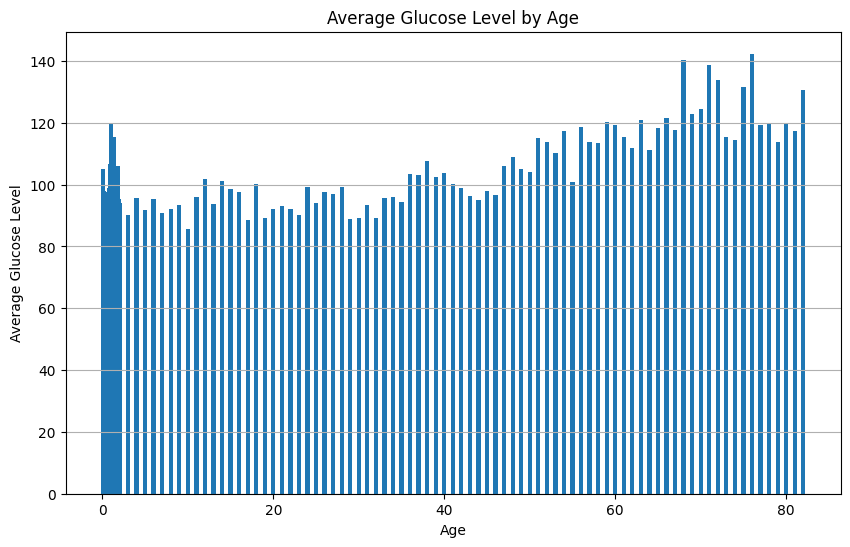

In [17]:
# Grouping the data by age and calculating the mean average glucose level for each age group
average_glucose_by_age = data.groupby('age')['avg_glucose_level'].mean()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_glucose_by_age.index, average_glucose_by_age, width=0.5)  # Adjust width for better visibility
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Average Glucose Level by Age')
plt.grid(axis='y')  # Adding grid lines for better readability
plt.show()


Each bar represents an age group, and its height shows the average glucose level. This helps us see if there are any patterns or trends between age and glucose levels. Adding grid lines makes the graph easier to read.

In [18]:
# Calculating Correlation between ahe and glucose level
correlation_coefficient = np.corrcoef(data['age'], data['avg_glucose_level'])[0, 1]
print("correlation between age and average glucose level:", correlation_coefficient)

correlation between age and average glucose level: 0.2381711141017433


This coefficient value indicates a positive correlation between age and average glucose level, albeit a relatively weak one. A positive correlation means that as age increases, the average glucose level tends to increase as well.

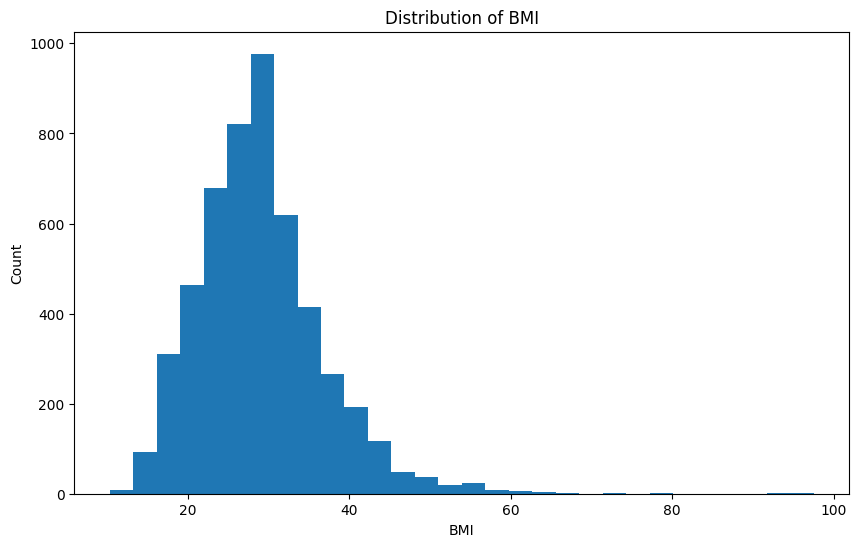

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(data['bmi'], bins=30)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.show()

The x-axis represents BMI values, while the y-axis shows the count of data points in each BMI range. This helps us understand the distribution of BMI values and identify any patterns or trends.

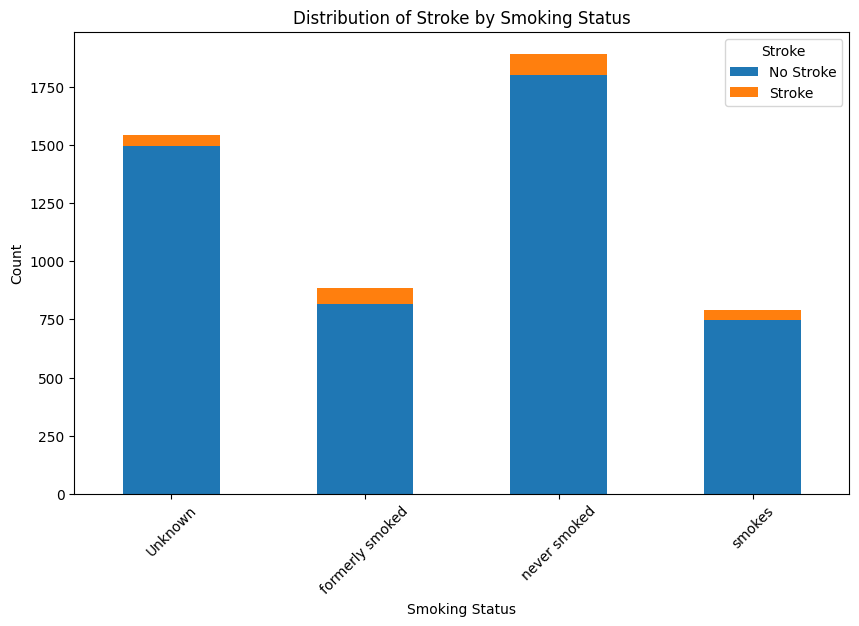

In [20]:
# Grouping the data by 'smoking_status' and counting occurrences of each category for 'stroke'
smoking_stroke_counts = data.groupby(['smoking_status', 'stroke']).size().unstack(fill_value=0)

# Plotting the bar plot
smoking_stroke_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Distribution of Stroke by Smoking Status')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.xticks(rotation=45)
plt.show()

This helps us compare the distribution of strokes across different smoking statuses. Adding labels and rotating the x-axis ticks makes the plot easier to understand.






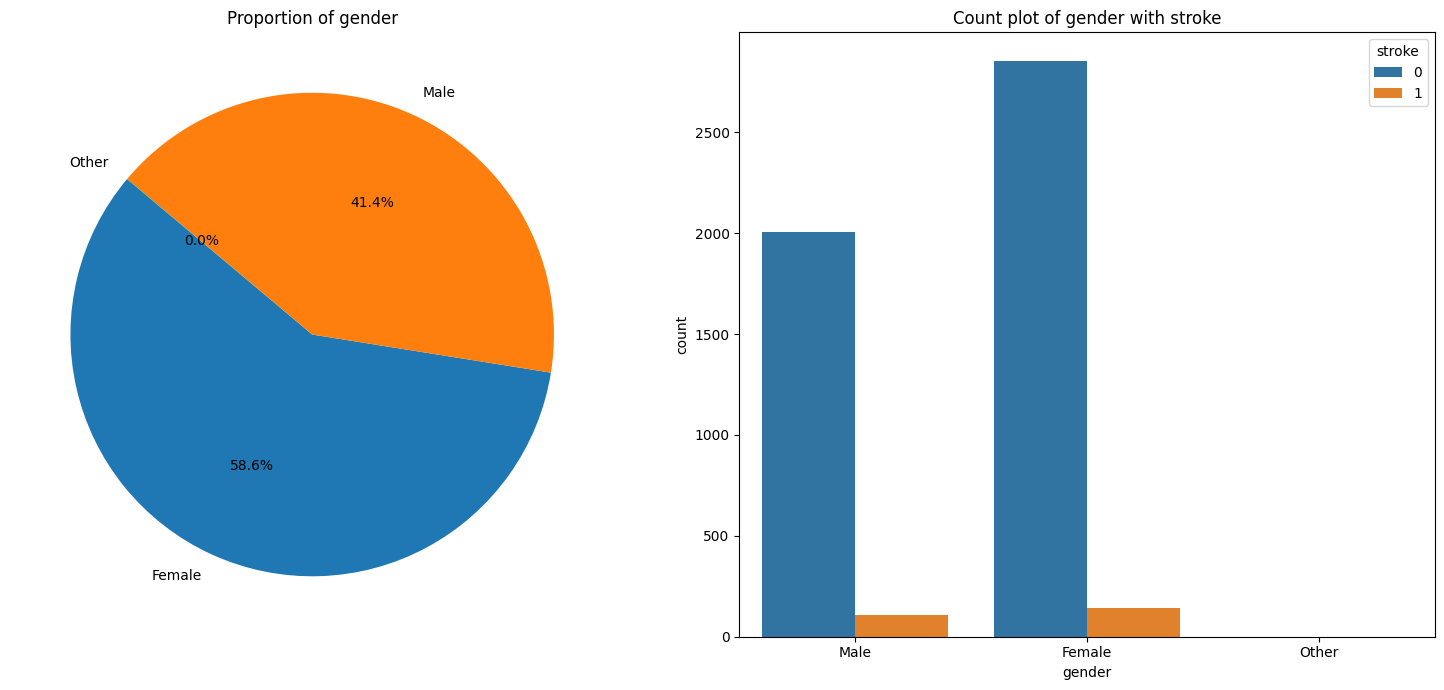

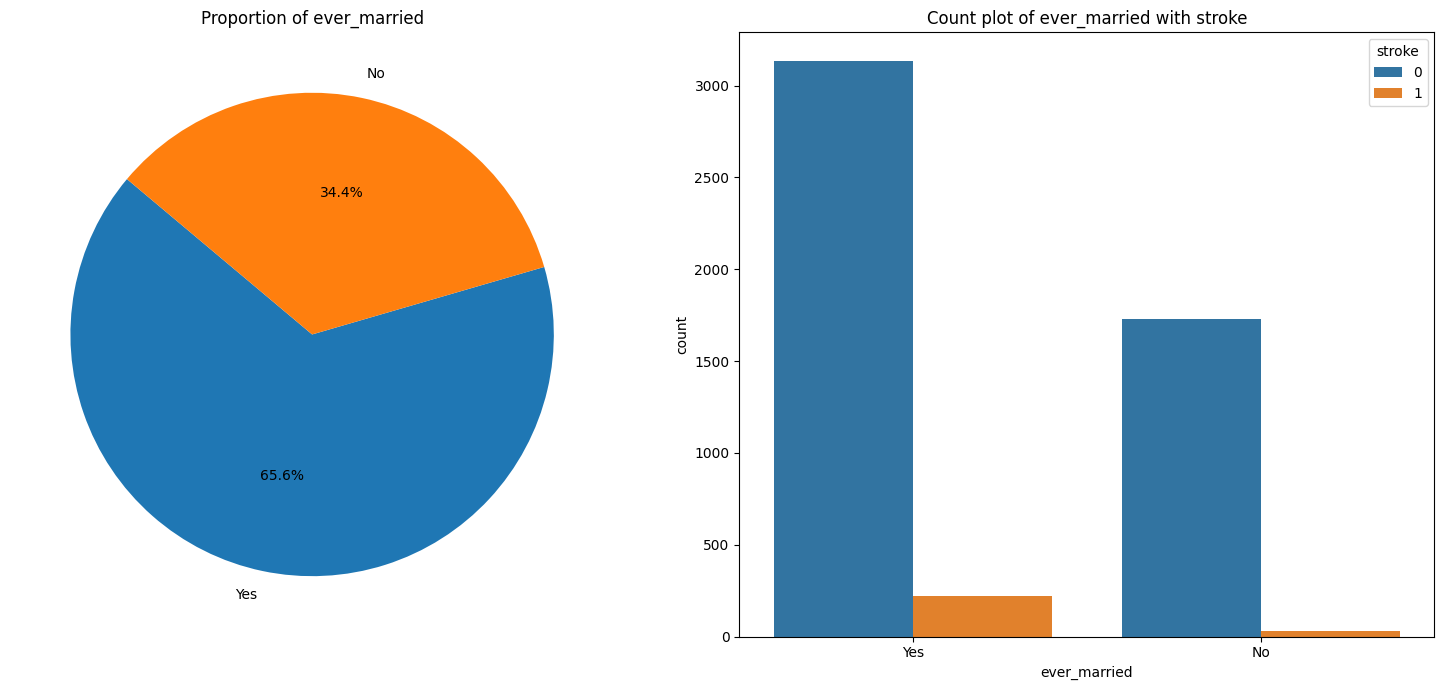

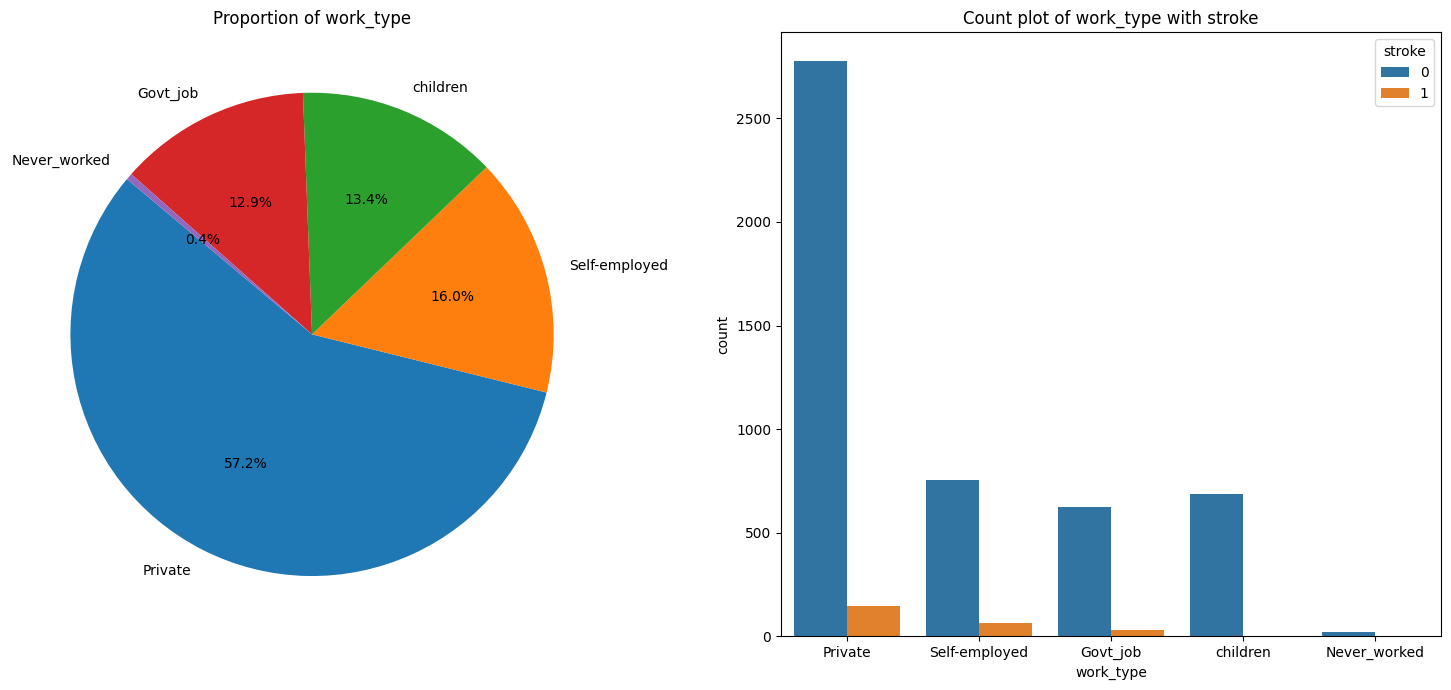

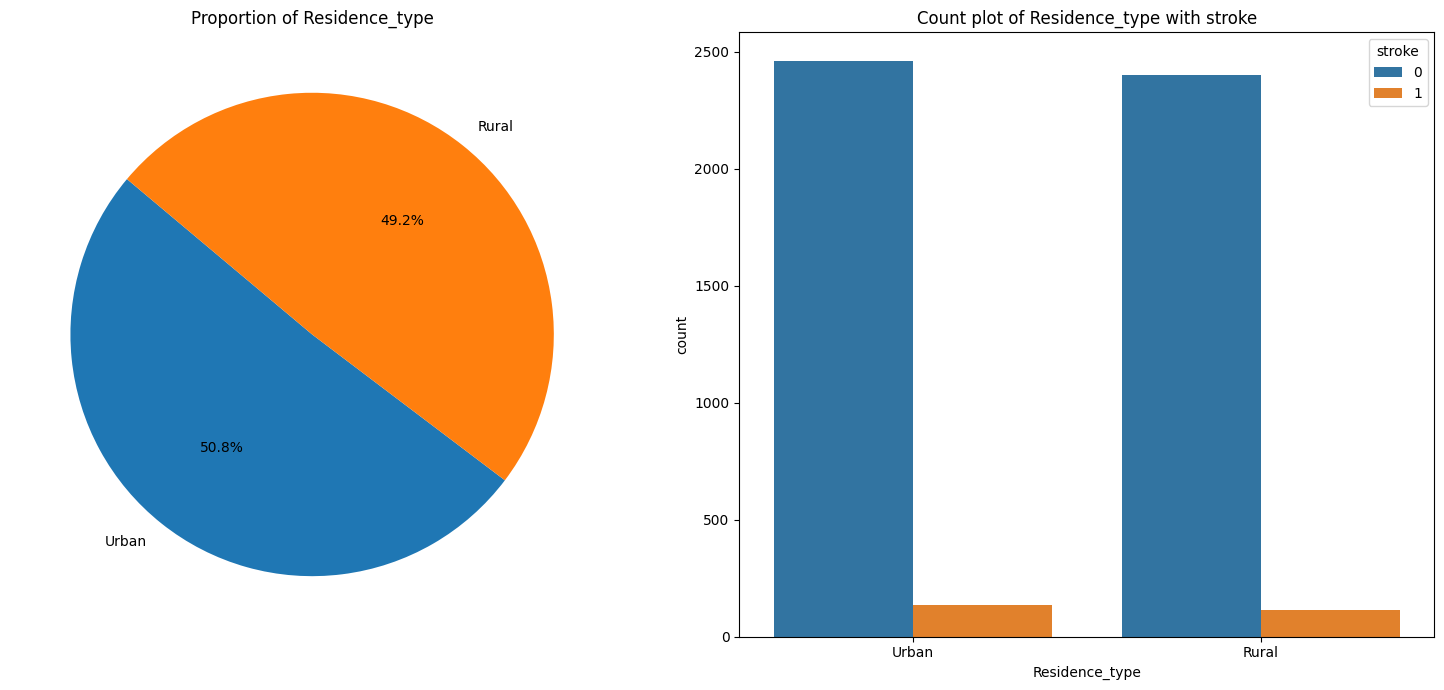

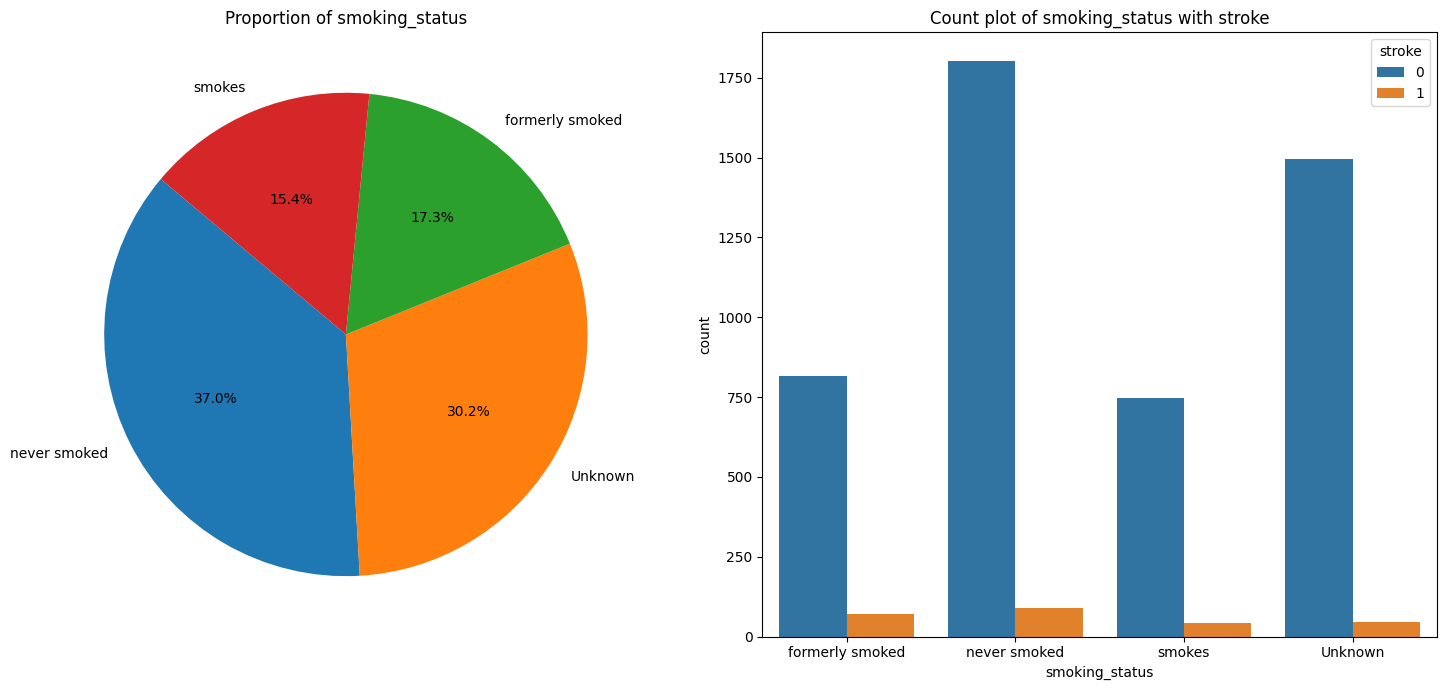

In [21]:
for i in data.columns:
    # Checking if the datatype of the column is 'object' (categorical)
    if data[i].dtype == "object":

        # Creating a figure for plotting
        fig, axs = plt.subplots(1, 2, figsize=(15, 7))

        # Plotting a pie chart to show the proportion of each category within the variable
        ax1 = axs[0]  # First subplot for the pie chart
        ax1.pie(data[i].value_counts(), labels=data[i].value_counts().index, autopct='%1.1f%%', startangle=140)
        ax1.set_title(f'Proportion of {i}')  # Setting the title of the pie chart

        # Plotting a count plot with respect to the 'stroke' variable
        ax2 = axs[1]  # Second subplot for the count plot
        sns.countplot(data=data, x=i, hue="stroke", ax=ax2)
        ax2.set_title(f'Count plot of {i} with stroke')  # Setting the title of the count plot

        plt.tight_layout()  # Adjusting layout to prevent overlap of plots
        plt.show()  # Displaying the plots

<ipython-input-22-3b1c5bb973d5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


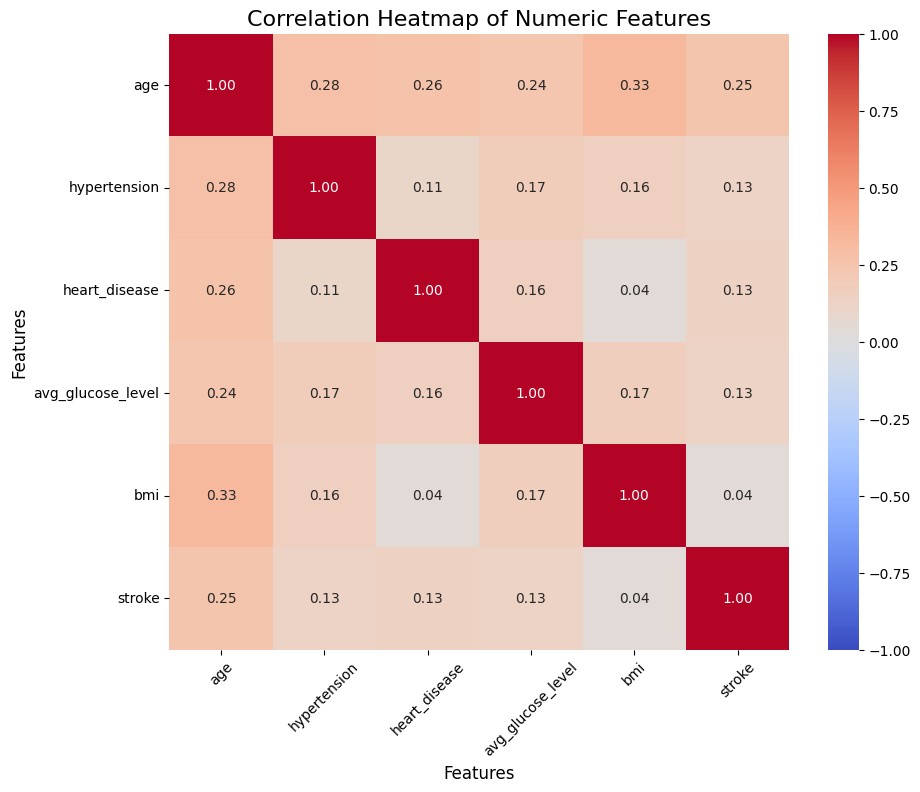

In [22]:
# Calculate correlation matrix
corr = data.corr()

# Set figure size and color map
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Customize annotations
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)


plt.show()

In [23]:
# Iterate through each column in the DataFrame
for col in data.columns:
    # Check if the data type of the column is 'object' (categorical)
    if data[col].dtype == 'object':
        # Print the column name as a header
        print("\n", col)
        # Print the unique values present in the column
        print(data[col].unique())



 gender
['Male' 'Female' 'Other']

 ever_married
['Yes' 'No']

 work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

 Residence_type
['Urban' 'Rural']

 smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [24]:
from sklearn.preprocessing import LabelEncoder

# Instantiate a LabelEncoder object
encoder = LabelEncoder()

# Apply LabelEncoder to all object-type columns
data[data.select_dtypes(include=['object']).columns] = data.select_dtypes(include=['object']).apply(encoder.fit_transform)

# Display the data types of each column after encoding
data.dtypes


gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate a MinMaxScaler object
scaler = MinMaxScaler()

# Iterate through each column in the DataFrame
for col_name in data.columns:
    # Check if the number of unique values in the column is greater than 5
    if data[col_name].nunique() > 5:
        # Apply MinMaxScaler to the column if the condition is met
        data[col_name] = scaler.fit_transform(data[[col_name]])

# Display the first 5 rows of the DataFrame after scaling
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,2,1,0.801265,0.301260,1,1
1,0,0.743652,0,0,1,3,0,0.679023,0.212944,2,1
2,1,0.975586,0,1,1,2,0,0.234512,0.254296,2,1
3,0,0.597168,0,0,1,2,1,0.536008,0.276060,3,1
4,0,0.963379,1,0,1,3,0,0.549349,0.156930,2,1


We have changed all the categorical datas into numerical data.

#Primary Model


In [26]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data.drop("stroke", axis=1)
y = data["stroke"]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Perform a sanity check to ensure correct data splitting
if X_train.shape[0] == y_train.shape[0]:
    print("Data splitting successful. Ready to proceed with model training.")
else:
    print("Error: Data splitting failed. Please check X_train and y_train.")


Data splitting successful. Ready to proceed with model training.


# Using Gradient Boosting Classifier

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
# Create an instance of GradientBoostingClassifier
gb = GradientBoostingClassifier()
# Fit the classifier to the training data
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [28]:
# Predict on the test data using Gradient Boosting
y_pred_gb = gb.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score

accuracy_using_gradient_boosting = round(accuracy_score(y_test, y_pred_gb) * 100, 2)
print("Model accuracy using Gradient Boosting: ", accuracy_using_gradient_boosting, "%")


Model accuracy using Gradient Boosting:  94.32 %


# Using Logistic Regression Model

In [29]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [30]:
#predict on the test data
y_pred_lr = clf.predict(X_test)
#Calculating accuracy
from sklearn.metrics import accuracy_score
accuracy_using_logistics_regression= round(accuracy_score(y_test, y_pred_lr)*100,2)
print("Model accuracy using Logistic Regression: ", accuracy_using_logistics_regression,"%")


Model accuracy using Logistic Regression:  94.19 %


The Logistic Regression model achieved an accuracy of 94.19%.

The Gradient Boosting model achieved a slightly higher accuracy of 94.32%.

Therefore, in this dataset, the Gradient Boosting model performed slightly better than the Logistic Regression model, as it achieved a slightly higher accuracy score.

#Hyper-parameter Optimization with Cross-Validation.

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter distributions for Randomized Search
gb_param_dist = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Initialize RandomizedSearchCV
gb_random_search = RandomizedSearchCV(estimator=gb, param_distributions=gb_param_dist, n_iter=10, cv=3, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

# Fit the random search to the data
gb_random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters for Gradient Boosting Classifier:")
print(gb_random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for Gradient Boosting Classifier:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.01}


In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter distributions for Randomized Search
lr_param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2']
}

# Initialize the Logistic Regression Classifier
lr = LogisticRegression()

# Initialize RandomizedSearchCV
lr_random_search = RandomizedSearchCV(estimator=lr, param_distributions=lr_param_dist, n_iter=10, cv=3, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

# Fit the random search to the data
lr_random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters for Logistic Regression Classifier:")
print(lr_random_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for Logistic Regression Classifier:
{'penalty': 'l2', 'C': 0.001}


#Feature Selection

In [34]:
#Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

#Defining the number of feature to select
k_features=10;

# Initialize SelectKBest with the ANOVA F-value test
selector = SelectKBest(score_func=f_classif, k=k_features)

# Fit the selector to the training data and transform it
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train.columns[selected_feature_indices]

# Use the selected features for training and testing your models
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Print the selected features
print("Selected features:", selected_features)


Selected features: Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')


#Final Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting Classifier with best hyper-parameters
best_gb_params = {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 1}
gb_best = GradientBoostingClassifier(**best_gb_params)
gb_best.fit(X_train_selected, y_train)

# Evaluate model
y_pred_gb_best = gb_best.predict(X_test_selected)
accuracy_gb_best = accuracy_score(y_test, y_pred_gb_best)

# Print model performance
print("Gradient Boosting Classifier - Accuracy:", accuracy_gb_best)

Gradient Boosting Classifier - Accuracy: 0.9217221135029354


In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier with best hyper-parameters
best_lr_params = {'penalty': 'l2', 'C': 0.1}  # Assuming these are the best hyperparameters for logistic regression
lr_best = LogisticRegression(**best_lr_params)
lr_best.fit(X_train_selected, y_train)

# Evaluate model
y_pred_lr_best = lr_best.predict(X_test_selected)
accuracy_lr_best = accuracy_score(y_test, y_pred_lr_best)

# Print model performance
print("Logistic Regression Classifier - Accuracy:", accuracy_lr_best)


Logistic Regression Classifier - Accuracy: 0.9419439008480104


#Conclusion


Model Performance:

The models achieved an accuracy of 94.32% and 94.19% respectively using RandomSearch for hyperparameter optimization. Both RandomSearchClassifier and Logistic Regression contributed to this performance level.

Effect of Methods:

Yes, the methods I used did result in a slight change in the Gradient Boosting Classifier. There was a decrease of 2% in the accuracy of the Gradient Boosting Classifier.

Learnings and Future Directions:

From this experiment, I've realized the significance of choosing the right methods when building models. Going forward, I plan to explore advanced techniques for tuning parameters and selecting features to make the models even better. I'll also work on understanding the data better so that I can make smarter choices during model development.